In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Final/fake reviews dataset.csv")
df=df.loc[:,["category","label","text_"]].dropna().reset_index(drop=True) #select txt content (input) and rating (output) from the dataframe

In [ ]:
len(df)

40432

In [ ]:

df['label1'] = df['label'].apply(lambda x: 1 if x == 'CG' else 0)

In [ ]:
from sklearn.model_selection import train_test_split
rev=df["text_"]
target=df["label1"]
x_train, x_test, y_train, y_test = train_test_split(rev,target,test_size=0.2,random_state=0,stratify=target) #split the dataset to train, validation and test. Like we did before.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

# Number of words to consider as features
max_features = 10000

maxlen = 50 #Maximum sequence length
batch_size = 16 #the number of rows of input for each step

#Tokenizing
tokenizer=Tokenizer(max_features,oov_token="<?>")
tokenizer.fit_on_texts(x_train)
X_train=tokenizer.texts_to_sequences(x_train)
X_test=tokenizer.texts_to_sequences(x_test) #Those 4 rows transforms each text in texts to a sequence of integers. So it basically takes each word in the text and replaces it with its corresponding integer value from 1 - max_features

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')


print('Pad sequences (samples x text length)')
X_train = pad_sequences(X_train, maxlen=maxlen) #make sure that the length of every array reaches maxlen by filling zeros in front of all arrays. Not all text contents have the maxlen we set in original dataset.
X_test = pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

32345 train sequences
8087 test sequences
Pad sequences (samples x text length)
X_train shape: (32345, 50)
X_test shape: (8087, 50)


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
embedding_dim = 64
#input_dim, output_dim, input_lenght
model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
# After the Embedding layer,
# our activations have shape `(samples, maxlen, 64)`.
# when embedding connects to RNN or LSTM layers, flatten() is not needed.
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(16, return_sequences=True))
model.add(SimpleRNN(32)) # default activation is "tanh"
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 64)            640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 50, 32)            3104      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 50, 16)            784       
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                1568      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 645,489
Trainable params: 645,489
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='nadam', loss='binary_crossentropy', metrics='accuracy') #mape: Mean Absolute Percentage Error
history = model.fit(X_train, y_train,
                    epochs=50,
                    steps_per_epoch = 256,
                    batch_size=batch_size,
                   validation_data=(X_test,y_test))

keras.backend.clear_session()
del model

Epoch 1/50
256/256 [==============================] - 32s 91ms/step - loss: 0.4340 - accuracy: 0.7913 - val_loss: 0.3097 - val_accuracy: 0.8678
Epoch 2/50
256/256 [==============================] - 18s 71ms/step - loss: 0.2803 - accuracy: 0.8892 - val_loss: 0.2646 - val_accuracy: 0.8979
Epoch 3/50
256/256 [==============================] - 17s 68ms/step - loss: 0.2504 - accuracy: 0.9009 - val_loss: 0.2417 - val_accuracy: 0.9006
Epoch 4/50
256/256 [==============================] - 23s 91ms/step - loss: 0.2255 - accuracy: 0.9126 - val_loss: 0.2866 - val_accuracy: 0.8850
Epoch 5/50
256/256 [==============================] - 17s 68ms/step - loss: 0.2272 - accuracy: 0.9109 - val_loss: 0.2019 - val_accuracy: 0.9215
Epoch 6/50
256/256 [==============================] - 18s 70ms/step - loss: 0.2062 - accuracy: 0.9219 - val_loss: 0.2006 - val_accuracy: 0.9235
Epoch 7/50
256/256 [==============================] - 23s 90ms/step - loss: 0.2130 - accuracy: 0.9202 - val_loss: 0.2134 - val_accuracy:

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

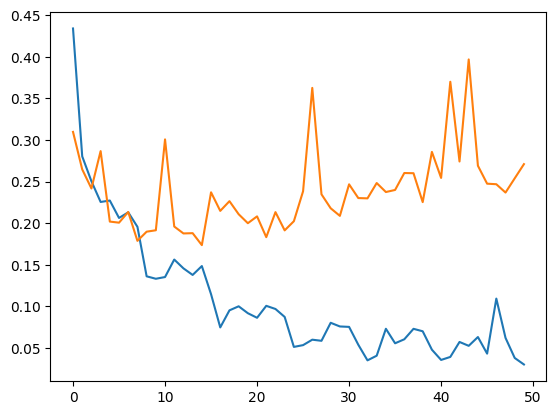

In [ ]:
import matplotlib.pyplot as plt
# Plot loss, val_loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.imshow

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

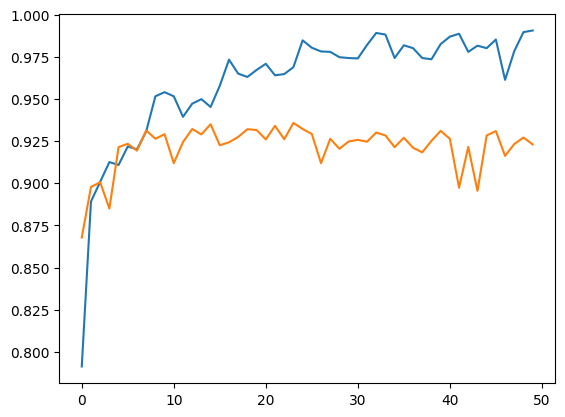

In [ ]:
import matplotlib.pyplot as plt
# Plot loss, val_loss
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.imshow

In [ ]:
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(Embedding(max_features, 64, input_length=maxlen))
model.add(layers.Conv1D(64, 5, activation='relu',kernel_regularizer="l2")) #Note, we use Conv1d here instead of Conv2d in Lab 3. Thats because the input shape changes. (decrease)
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu',kernel_regularizer="l2"))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 64)            640000    
                                                                 
 conv1d_2 (Conv1D)           (None, 46, 64)            20544     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 15, 64)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 11, 32)            10272     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_1 (Dense)             (None, 1)                

In [ ]:
model.compile(optimizer='nadam', loss='binary_crossentropy', metrics='accuracy') #mape: Mean Absolute Percentage Error
history = model.fit(X_train, y_train,
                    epochs=25,
                    steps_per_epoch = 256,
                    batch_size=batch_size,
                   validation_data=(X_test,y_test))

keras.backend.clear_session()
del model

Epoch 1/25
256/256 [==============================] - 9s 23ms/step - loss: 0.7685 - accuracy: 0.6941 - val_loss: 0.4393 - val_accuracy: 0.8582
Epoch 2/25
256/256 [==============================] - 8s 30ms/step - loss: 0.4040 - accuracy: 0.8701 - val_loss: 0.3720 - val_accuracy: 0.8780
Epoch 3/25
256/256 [==============================] - 6s 22ms/step - loss: 0.3588 - accuracy: 0.8821 - val_loss: 0.3523 - val_accuracy: 0.8839
Epoch 4/25
256/256 [==============================] - 6s 25ms/step - loss: 0.3459 - accuracy: 0.8896 - val_loss: 0.3316 - val_accuracy: 0.8914
Epoch 5/25
256/256 [==============================] - 6s 24ms/step - loss: 0.3178 - accuracy: 0.8975 - val_loss: 0.3160 - val_accuracy: 0.9043
Epoch 6/25
256/256 [==============================] - 6s 22ms/step - loss: 0.2975 - accuracy: 0.9075 - val_loss: 0.2978 - val_accuracy: 0.9034
Epoch 7/25
256/256 [==============================] - 7s 29ms/step - loss: 0.3060 - accuracy: 0.9033 - val_loss: 0.2881 - val_accuracy: 0.9146

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

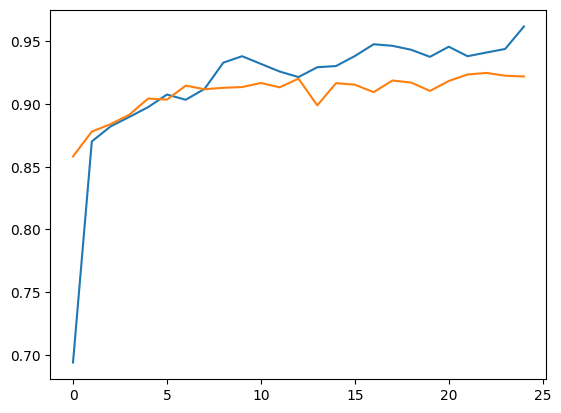

In [ ]:

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.imshow

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

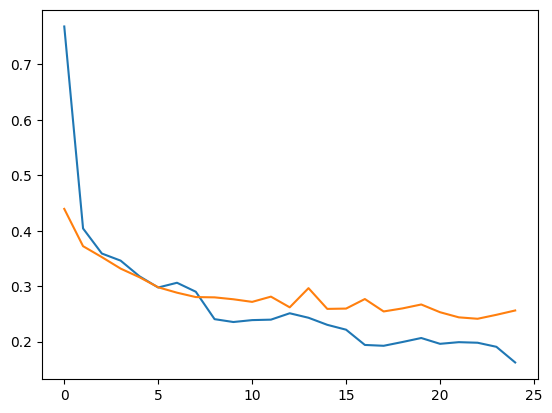

In [ ]:
import matplotlib.pyplot as plt
# Plot loss, val_loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.imshow

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 64, input_length=maxlen))
model.add(layers.Conv1D(64, 5, activation='relu'))
model.add(layers.LSTM(32,dropout=0.2,recurrent_dropout=0.2))
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 64)            640000    
                                                                 
 conv1d (Conv1D)             (None, 46, 64)            20544     
                                                                 
 lstm (LSTM)                 (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 672,993
Trainable params: 672,993
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='nadam', loss='binary_crossentropy', metrics='accuracy') #mape: Mean Absolute Percentage Error
history = model.fit(X_train, y_train,
                    epochs=25,
                    steps_per_epoch = 256,
                    batch_size=batch_size,
                   validation_data=(X_test,y_test))



Epoch 1/25
256/256 [==============================] - 67s 104ms/step - loss: 0.6713 - accuracy: 0.7317 - val_loss: 0.7293 - val_accuracy: 0.5334
Epoch 2/25
256/256 [==============================] - 27s 106ms/step - loss: 0.3829 - accuracy: 0.8521 - val_loss: 0.3781 - val_accuracy: 0.8818
Epoch 3/25
256/256 [==============================] - 30s 119ms/step - loss: 0.3254 - accuracy: 0.8804 - val_loss: 0.3088 - val_accuracy: 0.9035
Epoch 4/25
256/256 [==============================] - 30s 117ms/step - loss: 0.3616 - accuracy: 0.9021 - val_loss: 0.2997 - val_accuracy: 0.9138
Epoch 5/25
256/256 [==============================] - 26s 101ms/step - loss: 0.4637 - accuracy: 0.8076 - val_loss: 0.3347 - val_accuracy: 0.8763
Epoch 6/25
256/256 [==============================] - 25s 99ms/step - loss: 0.3915 - accuracy: 0.8645 - val_loss: 0.3472 - val_accuracy: 0.8798
Epoch 7/25
256/256 [==============================] - 25s 97ms/step - loss: 0.3290 - accuracy: 0.9004 - val_loss: 0.3085 - val_accu

253/253 [==============================] - 4s 16ms/step


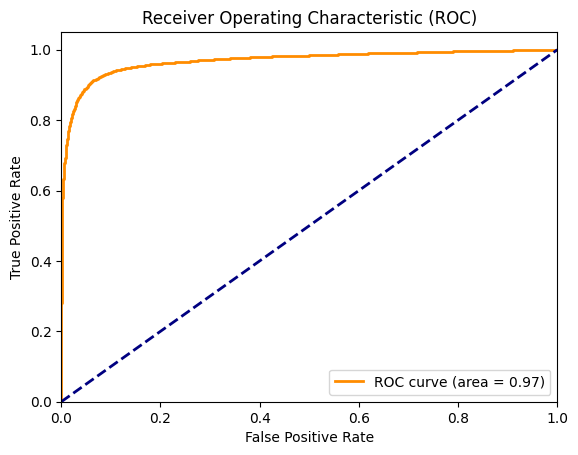

AUC Score: 0.9693930699970372


In [ ]:
# Predict probabilities on the test set
y_pred_prob = model.predict(X_test)

# Calculate FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Calculate AUC score
auc_score = auc(fpr, tpr)
print("AUC Score:", auc_score)


<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

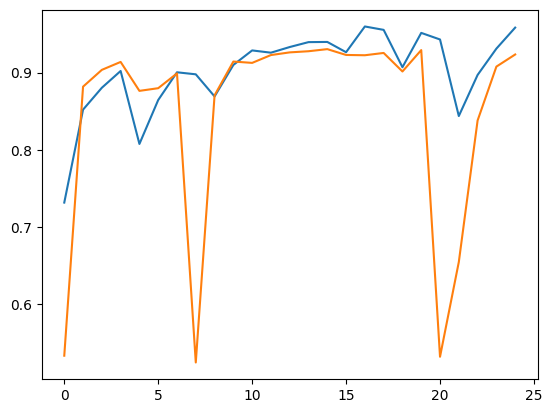

In [ ]:

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.imshow

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

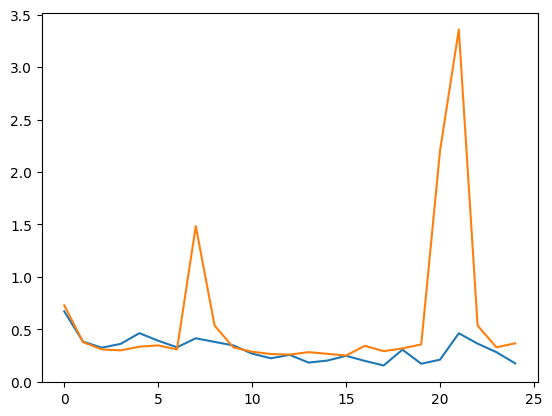

In [ ]:
import matplotlib.pyplot as plt
# Plot loss, val_loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.imshow

In [ ]:
keras.backend.clear_session()
del model

In [ ]:


from keras.layers import Embedding, LSTM, Dense, Bidirectional, Conv1D
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense
from keras.layers import Dropout



model = Sequential()
model.add(Embedding(max_features, 64, input_length=maxlen))
model.add(Conv1D(64, 5, activation='relu',kernel_regularizer="l2"))
model.add(Bidirectional(LSTM(32, dropout=0.3, recurrent_dropout=0.3, return_sequences=True,kernel_regularizer="l2")))
model.add(Bidirectional(LSTM(32, dropout=0.3, recurrent_dropout=0.3,kernel_regularizer="l2")))
model.add(Dense(1,activation='sigmoid'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 64)            640000    
                                                                 
 conv1d_1 (Conv1D)           (None, 46, 64)            20544     
                                                                 
 bidirectional_2 (Bidirectio  (None, 46, 64)           24832     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 710,273
Trainable params: 710,273
Non-tr

In [ ]:
model.compile(optimizer='nadam', loss='binary_crossentropy', metrics='accuracy') #mape: Mean Absolute Percentage Error
history = model.fit(X_train, y_train,
                    epochs=25,
                    steps_per_epoch = 256,
                    batch_size=batch_size,
                   validation_data=(X_test,y_test))



Epoch 1/25
256/256 [==============================] - 105s 333ms/step - loss: 1.3805 - accuracy: 0.7402 - val_loss: 0.3672 - val_accuracy: 0.8765
Epoch 2/25
256/256 [==============================] - 81s 318ms/step - loss: 0.3427 - accuracy: 0.8774 - val_loss: 0.3015 - val_accuracy: 0.8939
Epoch 3/25
256/256 [==============================] - 79s 310ms/step - loss: 0.3107 - accuracy: 0.8928 - val_loss: 0.2844 - val_accuracy: 0.9057
Epoch 4/25
256/256 [==============================] - 86s 335ms/step - loss: 0.2898 - accuracy: 0.8994 - val_loss: 0.3030 - val_accuracy: 0.8702
Epoch 5/25
256/256 [==============================] - 85s 331ms/step - loss: 0.2610 - accuracy: 0.9109 - val_loss: 0.2521 - val_accuracy: 0.9123
Epoch 6/25
256/256 [==============================] - 82s 323ms/step - loss: 0.2655 - accuracy: 0.9082 - val_loss: 0.2715 - val_accuracy: 0.9002
Epoch 7/25
256/256 [==============================] - 83s 324ms/step - loss: 0.2410 - accuracy: 0.9194 - val_loss: 0.2534 - val_a

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

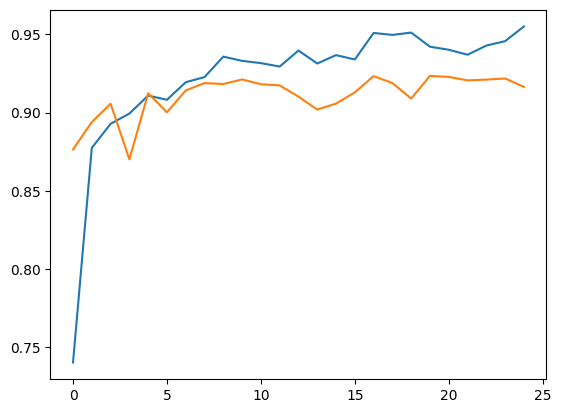

In [ ]:

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.imshow

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

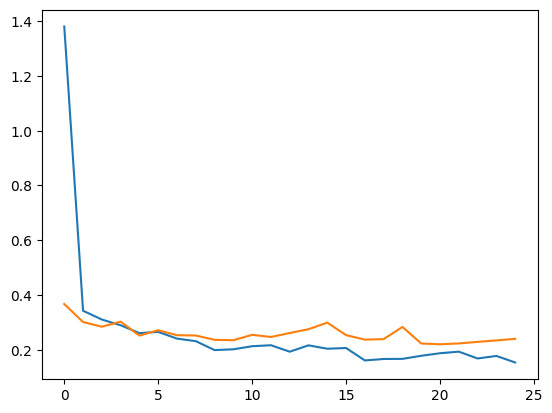

In [ ]:
import matplotlib.pyplot as plt
# Plot loss, val_loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.imshow

253/253 [==============================] - 11s 38ms/step


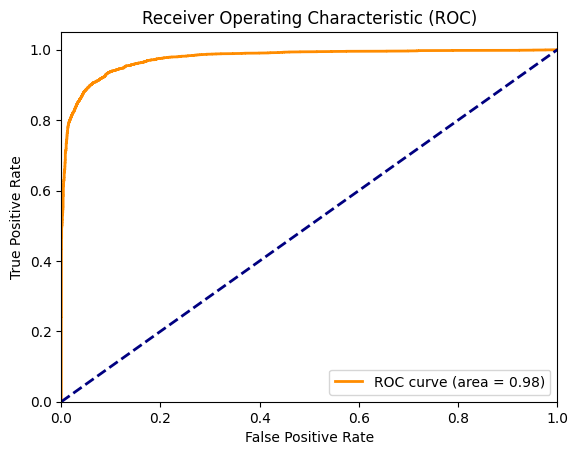

AUC Score: 0.9758986175566177


In [ ]:
# Predict probabilities on the test set
y_pred_prob = model.predict(X_test)

# Calculate FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Calculate AUC score
auc_score = auc(fpr, tpr)
print("AUC Score:", auc_score)


In [ ]:
keras.backend.clear_session()
del model